In [18]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [7]:
# Выполним инициализацию основных используемых модулей
%matplotlib inline

import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import numpy as np

import warnings
warnings.filterwarnings("ignore")


In [9]:

with open('wine_quality.csv') as f:
    f.readline()  # пропуск заголовочной строки
    data = np.loadtxt(f, delimiter=';')

In [10]:
TRAIN_SIZE = 0.7 # Разделение данных на обучающую и контрольную части в пропорции 70/30%
from sklearn.model_selection import train_test_split

y = data[:, -1]
np.place(y, y < 5, 5)
np.place(y, y > 7, 7)
y -= min(y)
X = data[:, :-1]
X = normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=0)

In [22]:
X.shape

(1599, 11)

In [32]:
print(model.summary()) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 11)                0         
                                                                 
 dense_4 (Dense)             (None, 50)                600       
                                                                 
 dense_5 (Dense)             (None, 3)                 153       
                                                                 
Total params: 753 (2.94 KB)
Trainable params: 753 (2.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [115]:
y_train_cat = keras.utils.to_categorical(y_train, 3)
y_test_cat = keras.utils.to_categorical(y_test, 3)
hidden_neurons_num = [50, 100, 200, 500, 700, 1000]
res_train_vec=[]
res_test_vec = []

In [116]:
for i in hidden_neurons_num:
    model = keras.Sequential([
        Flatten(input_shape=(11,1)),
        Dense(i, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
    a=model.fit(X_train, y_train_cat, batch_size=32, epochs=15, validation_split=0.2)
    res_train_vec.append(a.history['val_accuracy'][14])
    b=model.evaluate(X_test, y_test_cat)
    res_test_vec.append(b[1])

Epoch 1/15
28/28 [==============================] - 0s 6ms/step - loss: 1.0666 - accuracy: 0.4547 - val_loss: 1.0489 - val_accuracy: 0.4732
Epoch 2/15
28/28 [==============================] - 0s 2ms/step - loss: 1.0416 - accuracy: 0.4603 - val_loss: 1.0290 - val_accuracy: 0.4688
Epoch 3/15
28/28 [==============================] - 0s 2ms/step - loss: 1.0271 - accuracy: 0.4637 - val_loss: 1.0169 - val_accuracy: 0.4688
Epoch 4/15
28/28 [==============================] - 0s 2ms/step - loss: 1.0181 - accuracy: 0.4637 - val_loss: 1.0092 - val_accuracy: 0.4688
Epoch 5/15
28/28 [==============================] - 0s 2ms/step - loss: 1.0122 - accuracy: 0.4637 - val_loss: 1.0039 - val_accuracy: 0.4688
Epoch 6/15
28/28 [==============================] - 0s 2ms/step - loss: 1.0084 - accuracy: 0.4626 - val_loss: 1.0003 - val_accuracy: 0.4688
Epoch 7/15
28/28 [==============================] - 0s 2ms/step - loss: 1.0056 - accuracy: 0.4626 - val_loss: 0.9976 - val_accuracy: 0.4688
Epoch 8/15
28/28 [==

In [117]:
res_train_vec

[0.4732142984867096,
 0.4642857015132904,
 0.4642857015132904,
 0.4732142984867096,
 0.4642857015132904,
 0.4732142984867096]

In [118]:
res_test_vec

[0.4729166626930237,
 0.47083333134651184,
 0.46875,
 0.4791666567325592,
 0.47083333134651184,
 0.4729166626930237]

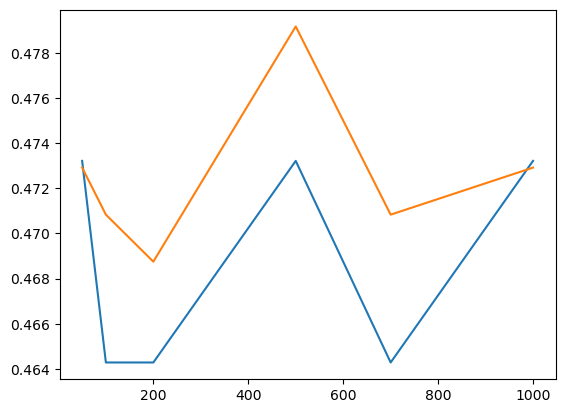

In [119]:
plt.plot(hidden_neurons_num,res_train_vec,hidden_neurons_num,res_test_vec)